      lead_source  total_leads  with_opportunity  without_opportunity  \
2  Email Campaign          117                99                   18   
1    Social Media          100                83                   17   
0      Trade Show           98                89                    9   
4        Referral           84                76                    8   
5   Phone Inquiry           22                18                    4   
3             Web           21                19                    2   
6         Partner           18                15                    3   

   conversion_rate  avg_deal_value  
2        84.615385    23282.828283  
1        83.000000    20626.506024  
0        90.816327    21449.438202  
4        90.476190    20013.157895  
5        81.818182    23222.222222  
3        90.476190    25473.684211  
6        83.333333    30466.666667  


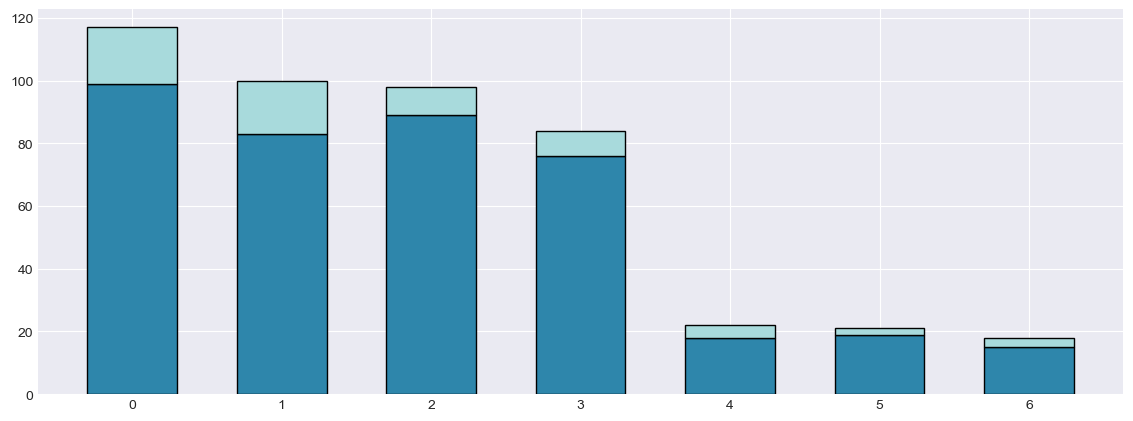

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('CleanSalesforceData.csv')

lead_source_metrics = []

lead_sources = df[df['lead_source'].notna()]['lead_source'].unique()

for source in lead_sources:
    source_data = df[df['lead_source'] == source]
    
    total_leads = len(source_data)
    
    # Records with opportunity_amount
    with_opportunity = source_data[source_data['opportunity_amount'].notna()]
    opportunity_count = len(with_opportunity)
    
    no_opportunity = total_leads - opportunity_count
    
    # Conversion rate
    conversion_rate = (opportunity_count / total_leads * 100) if total_leads > 0 else 0
    
    # Average deal value
    avg_deal_value = with_opportunity['opportunity_amount'].mean() if len(with_opportunity) > 0 else 0
    
    lead_source_metrics.append({
        'lead_source': source,
        'total_leads': total_leads,
        'with_opportunity': opportunity_count,
        'without_opportunity': no_opportunity,
        'conversion_rate': conversion_rate,
        'avg_deal_value': avg_deal_value
    })

# New data frame sorted by total leads
metrics_df = pd.DataFrame(lead_source_metrics)
metrics_df = metrics_df.sort_values('total_leads', ascending=False)
print(metrics_df)

# Create the visualization with two subplots
fig, ax1 = plt.subplots(1, 1, figsize=(14, 5))

#Stacked bar chart
x = np.arange(len(metrics_df))
width = 0.6

bars1 = ax1.bar(x, metrics_df['with_opportunity'], width, 
                label='With Opportunity', color='#2E86AB', edgecolor='black', linewidth=1)
bars2 = ax1.bar(x, metrics_df['without_opportunity'], width, 
                bottom=metrics_df['with_opportunity'],
                label='Without Opportunity', color='#A8DADC', edgecolor='black', linewidth=1)